In [96]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
sns.set_theme(style='whitegrid')
sns.set(rc={"figure.figsize":(12, 7)})

In [2]:
# df = None
# for f in os.listdir('dataframes'):
#     path = 'dataframes/' + f
#     load_df = pd.read_csv(path, index_col=0)
#     if df is None:
#         df = load_df
#         continue
#     df = pd.concat([df, load_df])
    
# df.reset_index(inplace=True)
# df.drop('level_0', axis=1, inplace=True)
# df.to_csv('conc_data.csv')

In [62]:
df = pd.read_csv('conc_data.csv', index_col=0)
df.case_common_parts_law_article.fillna('', inplace=True)
df.shape

(78861, 11)

Пока нет данных по 19.3 за 2022 год, не будем смотреть эти дела

In [66]:
df_short = df[~df.case_common_parts_law_article.str.contains('19.3')].reset_index().drop('level_0', axis=1)

In [67]:
df_short.case_user_entry_date = pd.to_datetime(df_short.case_user_entry_date, format='%d.%m.%Y')

In [68]:
df_short['year'] = df_short.case_user_entry_date.dt.year

In [69]:
df_short['month'] = df_short.case_user_entry_date.dt.month

In [70]:
df_short.groupby('year').size()

year
2021    13483
2022     7526
dtype: int64

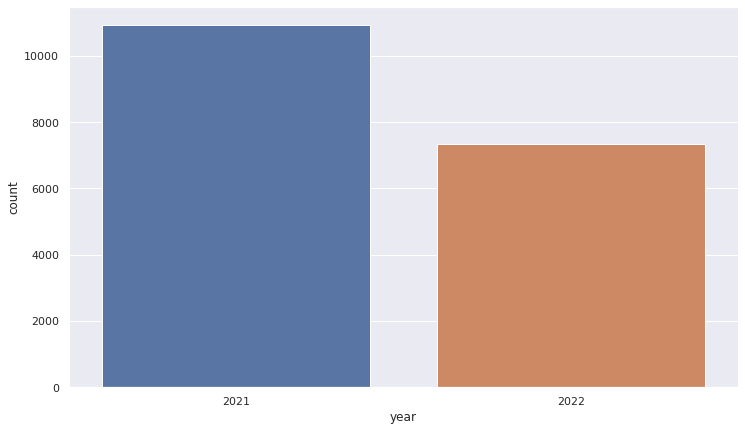

In [146]:
sns.countplot(
    data=df_short[df_short.month <= 6],
    x='year',
);

In [78]:
df_short_2021 = df_short[df_short.year == 2021].groupby(['year', 'month']).size().reset_index()
df_short_2021.columns.values[2] = 'sent_count'

df_short_2022 = df_short[df_short.year == 2022].groupby(['year', 'month']).size().reset_index()
df_short_2022.columns.values[2] = 'sent_count'

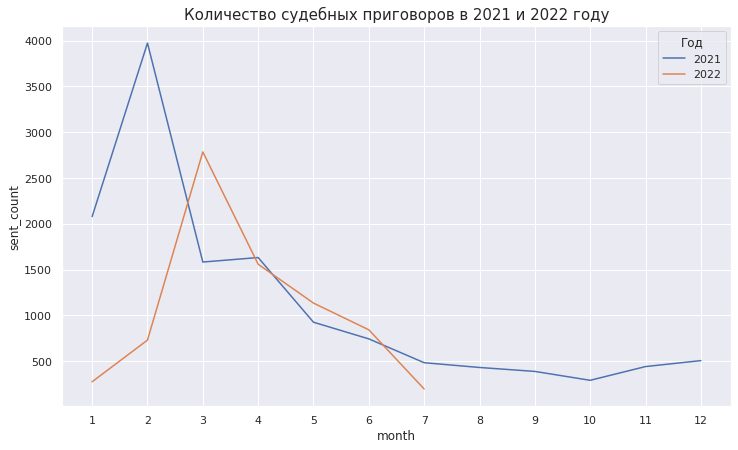

In [102]:
sns.lineplot(
    data=df_short_2021,
    x='month',
    y='sent_count',
).set_title('Количество судебных приговоров в 2021 и 2022 году', fontsize=15)

sns.lineplot(
    data=df_short_2022,
    x='month',
    y='sent_count',
)

plt.xticks(range(1, 13))
plt.legend(title='Год', labels=['2021', '2022'])

plt.show()

Приговоры по 20.2 в этом году прошли одним пиком в марте и в следующей месяце их количество сильно упало. В отличие от новой 20.3.3, которая падала от месяца к месяцу не так резко.

Также по 20.2 в абсолютных цифрах дел намного больше. По 20.2 на пике в марте было больше 2000 судебных дел, по 20.3.3 в два раза меньше -- ~770.

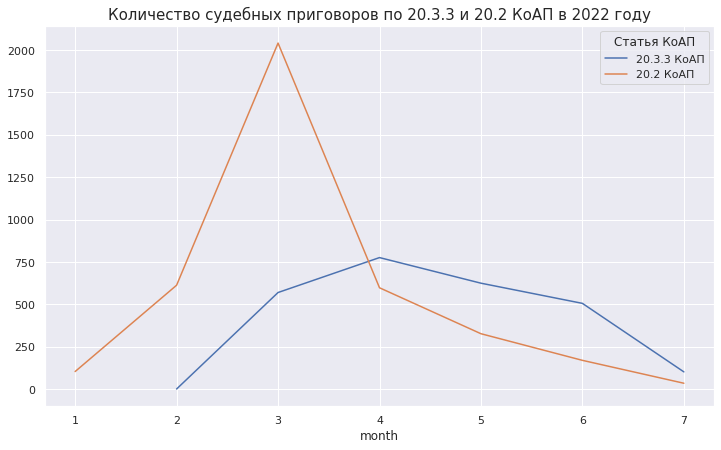

In [137]:
df_20_3_3_year2022 = df_short[df_short.case_common_parts_law_article.str.contains('20.3.3')].groupby('month').size()

df_20_2_year2022 = df_short[(df_short.case_common_parts_law_article.str.contains('20.2')) &
                    (df_short.year == 2022)].groupby('month').size()

sns.lineplot(
    data=df_20_3_3_year2022,
).set_title('Количество судебных приговоров по 20.3.3 и 20.2 КоАП в 2022 году', fontsize=15)

sns.lineplot(data=df_20_2_year2022);

plt.legend(title='Статья КоАП', labels=['20.3.3 КоАП', '20.2 КоАП']);

Сравним с 2021 годом

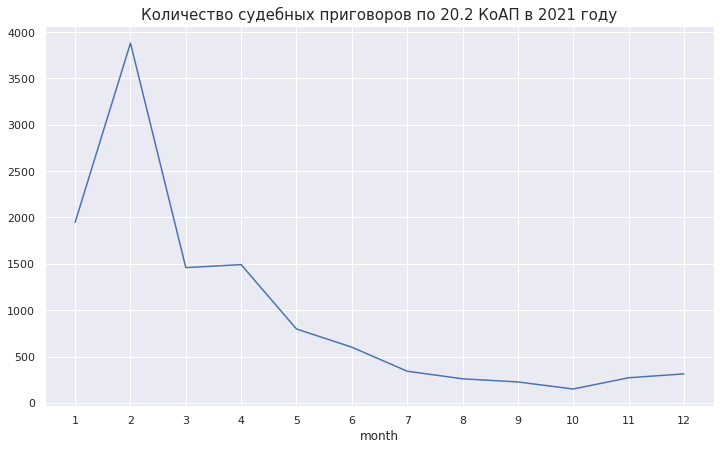

In [138]:
df_20_2_year2021 = df_short[
    (df_short.case_common_parts_law_article.str.contains('20.2')) &
    (df_short.year == 2021)
].groupby('month').size()

sns.lineplot(
    data=df_20_2_year2021,
).set_title('Количество судебных приговоров по 20.2 КоАП в 2021 году', fontsize=15);
plt.xticks(range(1, 13))
plt.show()

Ну и похоже, что гипотеза о том, что в 2022 году часть судебных дел перетекут в новые статьи подтверждается. Без новой стать 20.3.3 график 2022 года сильно уступает прошлому году.

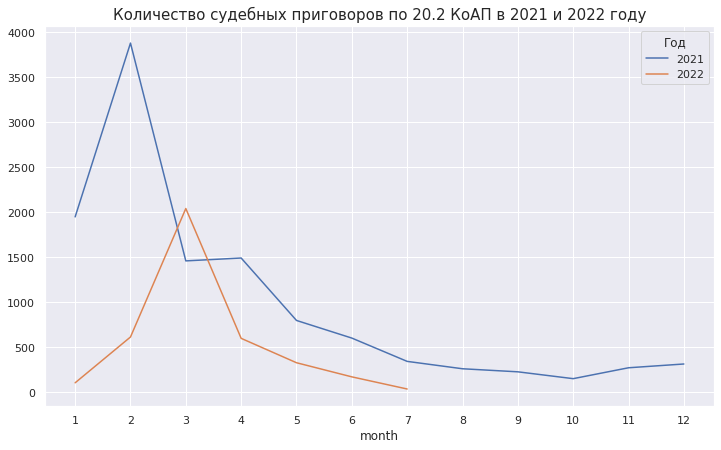

In [140]:
sns.lineplot(
    data=df_20_2_year2021,
).set_title('Количество судебных приговоров по 20.2 КоАП в 2021 и 2022 году', fontsize=15)

sns.lineplot(data=df_20_2_year2022)

plt.xticks(range(1, 13))
plt.legend(title='Год', labels=['2021', '2022'])

plt.show()

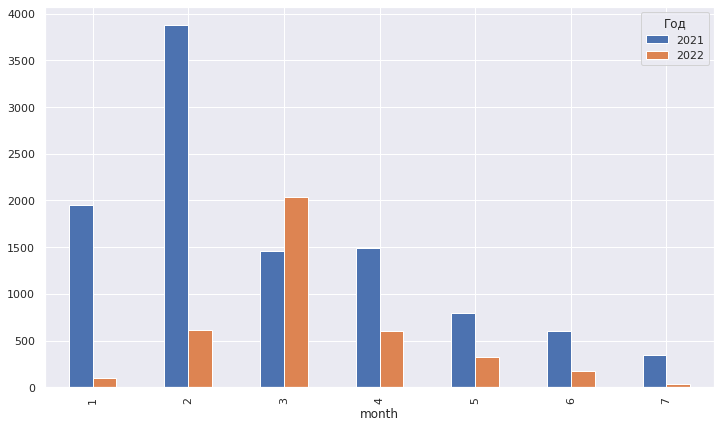

In [166]:
pd.concat([df_20_2_year2021[:7], df_20_2_year2022], axis=1).plot(kind='bar')
plt.legend(title='Год', labels=['2021', '2022'])

plt.show()

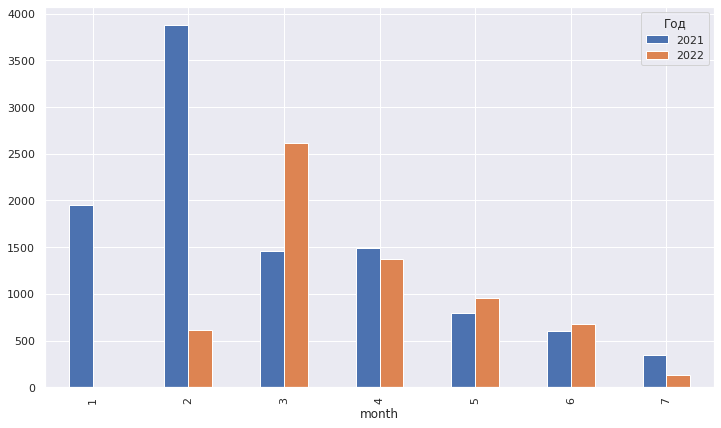

In [169]:
pd.concat([df_20_2_year2021[:7], df_20_3_3_year2022 + df_20_2_year2022], axis=1).plot(kind='bar')
plt.legend(title='Год', labels=['2021', '2022'])

plt.show()

**Что дальше**:
* распределение по регионам. Что изменилось?
* поправить датафреймы с уголовными статьями, в них всех пустые значения в строке `case_common_parts_law_article`
* посчитать сколько разных административных статей в одном деле. Какие пары часто идут в одном деле
* 